classification of diabetes data



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score

#Import data
df = pd.read_csv("https://drive.google.com/drive/u/2/folders/1ZukhjSEq6Rq0RqDwbLj1GyXSsGGqsEqy")

<ipython-input-3-e1ecd7496c7f>:9: DtypeWarning: Columns (38,41,44,48,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296

In [4]:
df.shape


(284, 4376)

In [5]:
df.head()


,"<!doctype html><html lang=""en-US"" dir=""ltr""><head><base href=""https://accounts.google.com/v3/signin/""><meta name=""referrer"" content=""origin""><style data-href=""https://www.gstatic.com/_/mss/boq-identity/_/ss/k=boq-identity.AccountsSignInUi.-EdtPCIkpg4.L.X.O/am=nwgrInNsAMr_B0ABAAGAAgUAAAAAAAAAQKCBWEI/d=1/ed=1/rs=AOaEmlHxpk4FK7A3wYkZ0mzkRX7Rtg8RlQ/m=identifierview",_b,"_tp"" nonce=""PVU430BKDzR_6yztt09KgQ"">c-wiz{contain:style}c-wiz>c-data{display:none}c-wiz.rETSD{contain:none}c-wiz.Ubi8Z{contain:layout style}@-webkit-keyframes mdc-ripple-fg-radius-in{0%{-webkit-animation-timing-function:cubic-bezier(0.4",0,0.2,1);-webkit-animation-timing-function:cubic-bezier(0.4,0.1,0.2.1,1);-o-animation-timing-function:cubic-bezier(0.4,0.3,...,16px)}@media (min-width:840px){.I7GnLc,.SOeSgb{margin-top:24px;margin-top:var(--c-sts-t,24px)}}.ObDc3.ZYOIke .I7GnLc,.ObDc3.ZYOIke .SOeSgb{margin-bottom:0;margin-top:16px}@media (min-width:840px){.ObDc3.ZYOIke .I7GnLc,.ObDc3.ZYOIke .SOeSgb{margin-top:24px}}.SfkAJe{-webkit-box-flex:1;-webkit-flex-grow:1;flex-grow:1}.XjS9D{display:-webkit-inline-box;display:-webkit-inline-flex;display:inline-flex}.XjS9D .VfPpkd-J1Ukfc-LhBDec{border-radius:22px}.XjS9D .VfPpkd-J1Ukfc-LhBDec::after{border-radius:24px}.XjS9D.eLNT1d{display:none}.XjS9D .TrZEUc .WpHeLc{position:absolute}.XjS9D .q6oraf .DMZ54e,".XjS9D .BqKGqe{font-family:""Google Sans""",roboto.6,Noto Sans Myanmar UI.6,arial.6,sans-serif;font-size:0.875rem;font-weight:500;font-weight:var(
0,--c-afwt,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,);letter-spacing:0rem;line-height:1.42857143...,.BqKGqe .VfPpkd-Jh9lGc{border-radius:20px}.XjS...,.eR0mzb:not(:disabled){color:#0b57d0;outline:#...,#0b57d0)}.Jskylb.Jskylb:not(:disabled){color:v...,#fff)}.Jskylb.Jskylb:not(:disabled):hover{colo...,#fff)}.Jskylb.Jskylb:not(:disabled).VfPpkd-ksK...,.Jskylb.Jskylb:not(:disabled):not(.VfPpkd-ksKs...,#fff)}.Jskylb.Jskylb:not(:disabled):not(:disab...,#fff)}.pIzcPc.pIzcPc:not(:disabled){color:var(...,#0b57d0)}.pIzcPc.pIzcPc:not(:disabled):hover{c...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,--c-brsz,48px,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,)}.bEbGY{-webkit-box-pack:center;-webkit-jus...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,--c-brsz,48px,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['smoking_history'].value_counts()

In [ ]:
#Split in 75% train and 25% test set
train_df, test_df = train_test_split(df, test_size = 0.34, random_state= 42)

#Separate target label
train_y = train_df['diabetes']
test_y = test_df['diabetes']

#Drop target label
train_x = train_df.drop(['diabetes'], axis = 1)
test_x = test_df.drop(['diabetes'], axis = 1)

In [ ]:
train_x.gender = [1 if i == "Female" else 0 for i in train_x.gender]
test_x.gender = [1 if i == "Female" else 0 for i in test_x.gender]

train_x.smoking_history= [1 if i=="current" else 2 if i=="former" else 3 if i=="not current" else 4 if i=="ever" else 5 if i=="never" else 6 if i=="No info" else 0 for i in train_x.gender]
test_x.smoking_history= [1 if i=="current" else 2 if i=="former" else 3 if i=="not current" else 4 if i=="ever" else 5 if i=="never" else 6 if i=="No info" else 0 for i in test_x.gender]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Build a Gaussian Classifier
model = MultinomialNB()

# Model training -- model.fit() is used to make predictions using given data i.e. it fits/maps
# the given data to the model
# creating the contingency probability table like we saw in the lecture

model.fit(train_x, train_y)

print("Train accuracy : ", model.score(train_x,train_y))
print("Test accuracy: ", model.score(test_x,test_y))


Train accuracy :  0.9054696969696969
Test accuracy:  0.9063235294117648


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#build decision tree
model = DecisionTreeClassifier(criterion='entropy')


#fit the tree to diabetes dataset
model.fit(train_x,train_y)

predicted = model.predict(test_x)
predictedt=model.predict(train_x)

print("Train accuracy : ", model.score(train_x,predictedt))
print("Test accuracy: ", model.score(test_x,predicted))




Train accuracy :  1.0
Test accuracy:  1.0


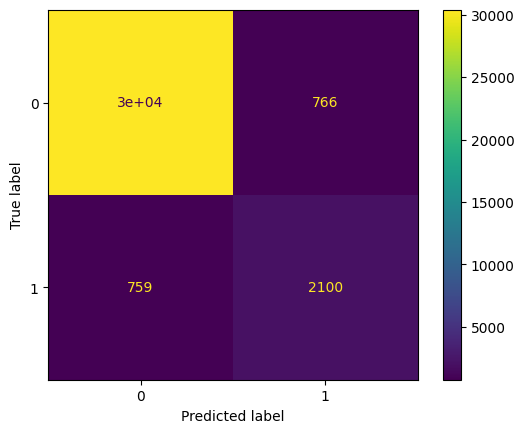

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


labels = [0,1]
cm = confusion_matrix(test_y, predicted, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

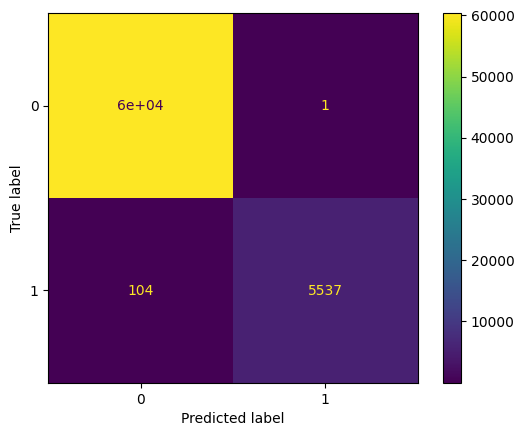

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


labels = [0,1]
cm = confusion_matrix(train_y, predictedt, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();